In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np
import seaborn as sns
sns.set()

Ссылка на kaggle:
    https://www.kaggle.com/des137/us-births-2018

### Импортируем данные

Файл довольно большой 508 МБ, загрузка 200 тыс строк:

In [2]:
df = pd.read_csv("US_births(2018).csv", delimiter=',', na_values = " ", nrows = 200000)

In [3]:
df.head(5).transpose()

,0,1,2,3,4
ATTEND,1,1,1,3,1
BFACIL,1,1,1,1,1
BMI,30.7,33.3,30,23.7,35.5
CIG_0,0,2,0,0,0
DBWT,3657,3242,3470,3140,2125
DLMP_MM,4,99,4,5,99
DLMP_YY,2017,9999,2017,2017,9999
DMAR,1,2,1,2,1
DOB_MM,1,1,1,1,1
DOB_TT,1227,1704,336,938,830


In [5]:
df.isnull().sum()

ATTEND              0
BFACIL              0
BMI                 0
CIG_0               0
DBWT                0
DLMP_MM             0
DLMP_YY             0
DMAR            15870
DOB_MM              0
DOB_TT              0
DOB_WK              0
DOB_YY              0
DWgt_R              0
FAGECOMB            0
FEDUC               0
FHISPX              0
FRACE15             0
FRACE31             0
FRACE6              0
ILLB_R              0
ILOP_R              0
ILP_R               0
IMP_SEX        199998
IP_GON              0
LD_INDL             0
MAGER               0
MAGE_IMPFLG    199973
MAR_IMP        199875
MBSTATE_REC         0
MEDUC               0
MHISPX              0
MM_AICU             0
MRACE15             0
MRACE31             0
MRACEIMP       193813
MRAVE6              0
MTRAN               0
M_Ht_In             0
NO_INFEC            0
NO_MMORB            0
NO_RISKS            0
PAY                 0
PAY_REC             0
PRECARE             0
PREVIS              0
PRIORDEAD 

### Удаление столбцов, где много пропусков
5 столбцов с пропусками. Оставим DMAR (семейное положение). Остальные удалим, т.к. много пропусков.

In [6]:
column_drop = {"IMP_SEX", "MAGE_IMPFLG", "MAR_IMP", "MRACEIMP"}
df.drop(columns=column_drop, inplace=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ATTEND,200000.0,1.239750,0.635722,1.0,1.0,1.0,1.0,9.0
BFACIL,200000.0,1.027085,0.269596,1.0,1.0,1.0,1.0,9.0
BMI,200000.0,28.635523,11.076294,13.1,22.5,26.3,31.7,99.9
CIG_0,200000.0,1.586925,8.334427,0.0,0.0,0.0,0.0,99.0
DBWT,200000.0,3253.441005,610.949285,227.0,2948.0,3289.0,3622.0,9999.0
DLMP_MM,200000.0,8.843050,15.394794,1.0,4.0,6.0,10.0,99.0
DLMP_YY,200000.0,2222.966540,1264.820606,2016.0,2017.0,2017.0,2018.0,9999.0
DMAR,184130.0,1.448748,0.497368,1.0,1.0,1.0,2.0,2.0
DOB_MM,200000.0,6.149675,3.631243,1.0,3.0,6.0,9.0,12.0
DOB_TT,200000.0,1226.465625,619.069603,0.0,801.0,1232.0,1716.0,9999.0


Видно, что вместо пропусков брались значения по умалчению: 9, 99, 999, 9999.
Удаляем столбец DOB_YY - год рождения (т.к. выгрузка за 2018 год, одно значение)

In [9]:
df.drop(columns={"DOB_YY"}, inplace=True)

### Зависимость веса от пола ребенка

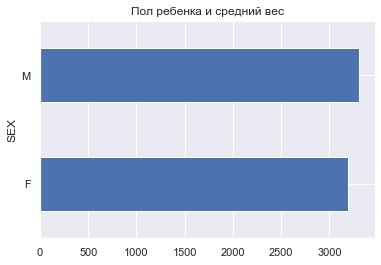

In [10]:
df[df.DBWT !=9999.0].groupby('SEX').mean()['DBWT'].plot(kind='barh')
plt.title("Пол ребенка и средний вес")
plt.show()

In [11]:
print("Средний вес мальчиков тяжелее девочек на ", 
     df[df.DBWT !=9999.0].groupby('SEX').mean()['DBWT'].iloc[1] -
     df[df.DBWT !=9999.0].groupby('SEX').mean()['DBWT'].iloc[0], " грамм")

Мальчики тяжелее девочек на  110.07329847578694  грамм


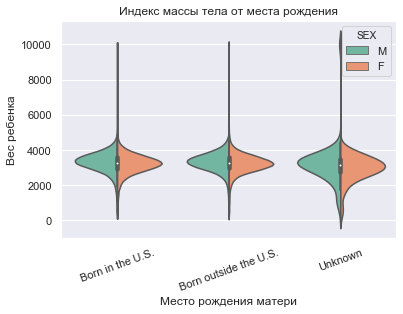

In [12]:
sns.violinplot(x='MBSTATE_REC', y='DBWT', data=df, hue="SEX",palette="Set2", split=True)
plt.title("Индекс массы тела от места рождения матери")
plt.ylabel('Вес ребенка')
plt.xlabel('Место рождения матери')
plt.xticks([0,1,2],["Born in the U.S.","Born outside the U.S.","Unknown"],rotation=20)
plt.show()

### День недели рождения ребенка

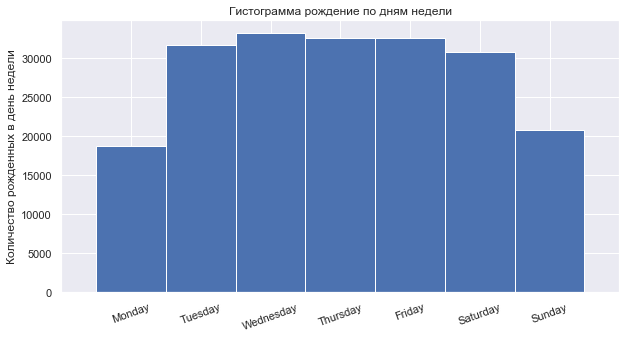

In [13]:
import calendar
import numpy as np
label_day = np.arange(1, 9)
plt.figure(figsize=(10,5))
df['DOB_WK'].plot(kind='hist', bins=label_day - 0.5)
plt.ylabel('Количество рожденных в день недели')
plt.xticks(label_day, calendar.day_name, rotation=20)
plt.title('Гистограмма рождение по дням недели')
plt.xlim([0, 8])
plt.show()

Странно, что в пн и вс почти на 50% меньше

### Рождаемость по месяцам

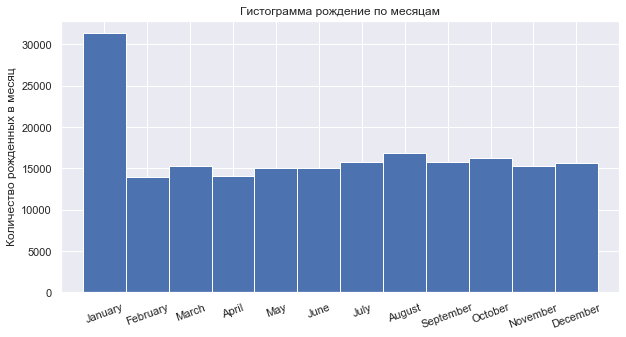

In [14]:
label_month = np.arange(1, 14)
plt.figure(figsize=(10,5))
df['DOB_MM'].plot(kind='hist', bins=label_month - 0.5)
plt.ylabel('Количество рожденных в месяц')
plt.xticks(label_month-1, calendar.month_name, rotation=20)
plt.title('Гистограмма рождение по месяцам')
plt.xlim([0, 13])
plt.show()

Вывод: DOB_MM (январь) = 1 -  или значение по умолчанию, или статистика за два года (2 раза январь попал). Проверим, построив такое же распределение по показателю DLMP_MM - последний  месяц менструаций. Если два раза январь в статистику вошел, тогда это должно в DLMP_MM тоже отразиться.

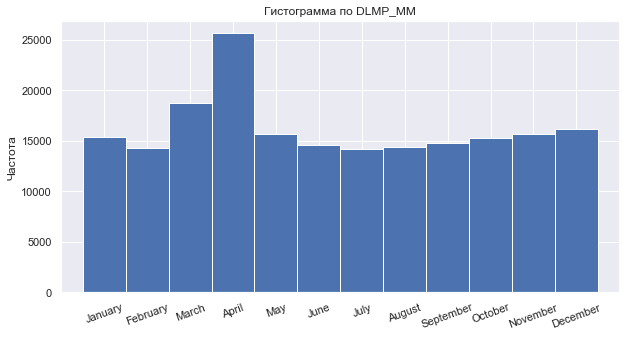

In [15]:
label_month = np.arange(1, 14)
plt.figure(figsize=(10,5))
df['DLMP_MM'].plot(kind='hist', bins=label_month - 0.5)
plt.ylabel('Частота')
plt.xticks(label_month-1, calendar.month_name, rotation=20)
plt.title('Гистограмма по DLMP_MM')
plt.xlim([0, 13])
plt.show()

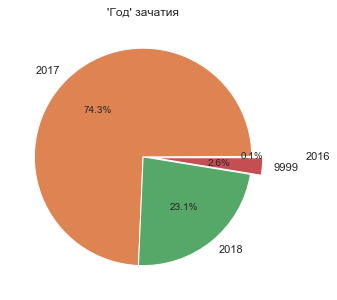

In [16]:
temp = df[df.DBWT !=9999.0].groupby("DLMP_YY").count()["DBWT"]
labels = temp.index
explode = (0.4, 0, 0, 0.1) 
sizes = temp
plt.figure(figsize=(5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title("'Год' зачатия")
plt.show()

2.6 % - незаполненные года последней менструации. 

### Посмотрим, что с возрастом матери и отца

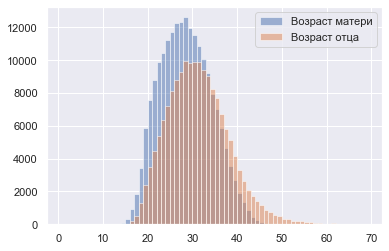

In [17]:
#plt.scatter(df["MAGER"], df["FAGECOMB"], s=area, c=colors, alpha=0.5)
bins = np.arange(1, 70)
plt.hist(df["MAGER"], bins, alpha=0.5, label='Возраст матери')
plt.hist(df["FAGECOMB"], bins, alpha=0.5, label='Возраст отца')
plt.legend(loc='upper right')
plt.show()

Если построить в другом масштабе, то будет видно, что возраст отца часто не определен (значение 99)

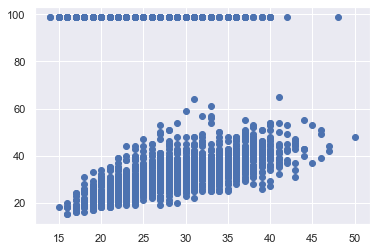

In [18]:
temp = df[["MAGER","FAGECOMB"]].sample(3000)
plt.scatter(temp["MAGER"], temp["FAGECOMB"])
plt.show()

### Образование матерей и отцов

Описание
ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/UserGuide2018-508.pdf


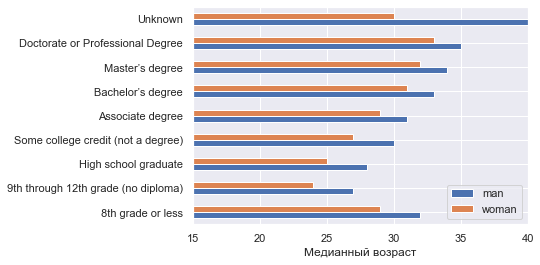

In [19]:
woman = df.groupby('MEDUC').median()['MAGER']
man = df.groupby('FEDUC').median()['FAGECOMB']
two = pd.concat([man,woman], axis = 1)
two.plot(kind='barh')
plt.yticks(np.arange(9), ('8th grade or less', 
                          '9th through 12th grade (no diploma)', 
                          'High school graduate', 
                          'Some college credit (not a degree)', 
                          'Associate degree', 
                          'Bachelor’s degree', 
                          'Master’s degree', 
                          'Doctorate or Professional Degree',
                          'Unknown' ))

plt.xlabel('Медианный возраст')
plt.xlim(15, 40)
plt.legend(["man","woman"])
plt.show()

### Race

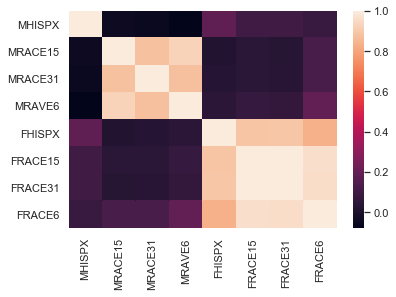

In [20]:
temp = df[['MHISPX','MRACE15', 'MRACE31','MRAVE6','FHISPX', 'FRACE15', 'FRACE31', 'FRACE6']]
sns.heatmap(temp.corr());

### Время рождения


Text(0.5, 1.0, 'Time of Birth')

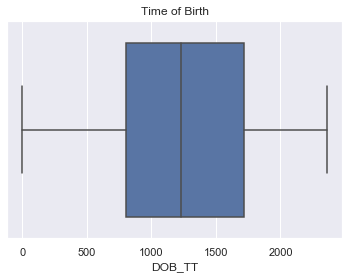

In [21]:
sns.boxplot(df[df['DOB_TT'] < 2400]['DOB_TT']).set_title('Time of Birth')

### Следующая беременность

df["ILLB_R"] == 0-3 - plural
df["ILLB_R"] == 888 - 1th
df["ILLB_R"] == 999 - unknown

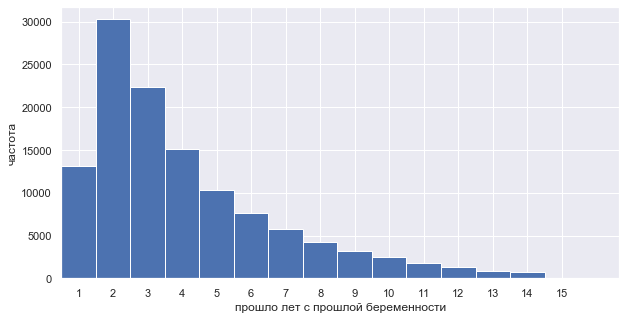

In [22]:
label_year = np.arange(1, 16)
bin_month = (label_year)*12 -6
plt.figure(figsize=(10,5))
df["ILLB_R"].plot(kind='hist', bins=bin_month)
plt.ylabel('частота')
plt.xlabel('прошло лет с прошлой беременности')
plt.xticks(bin_month+6, label_year)
plt.xlim([6, 200])
plt.show()